<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

# TFM - Sistema de alerta ante la presencia de Didymosphenia Geminata en agua dulce con técnicas de inteligencia artificial

Presentado por: Aracena Vallejos, Estefania – Medina Jiménez, Lenin  
Directora: Prados Privado, María

## EDA
Procedimiento para preparar los datos a ser utilizado en los diferentes modelos de predicción.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Ambientales.csv', sep=",")
data2= pd.read_excel('Diatomeas.xlsx')

In [3]:
data2['Didymosphenia geminata'].values

array([0, 0, 0, ..., 0, 's/m', 's/m'], dtype=object)

In [4]:
data['Didymo']=data2['Didymosphenia geminata']

In [5]:
data

,ID,nom_est,cod_region,region,cod_provincia,nom_provincia,cod_comuna,comuna,cod_cuenca,cuenca,...,%Cob_algal_ausente,%Cob_algal_Pequenas colonias,%Cob_algal_Mediana,%Cob_algal_Alta,%Cob_algal_Muy Alta,Cond_cpo_agua_Normal,Cond_cpo_agua_Espumas superficie,Cond_cpo_agua_Descargas,Cond_cpo_agua_Material Aloctono,Didymo
0,1,Cato B,16,nuble,161,Diguillin,16101,Chillan,81,Rio Itata,...,0,0,0,1,0,1,1,0,0,0
1,2,nuble 2A,16,nuble,163,Punilla,16301,San Carlos,81,Rio Itata,...,0,0,0,1,0,0,1,0,0,0
2,3,Chillan A,16,nuble,163,Punilla,16302,Coihueco,81,Rio Itata,...,0,0,0,1,0,1,0,0,0,0
3,4,Chillan B,16,nuble,161,Diguillin,16106,Pinto,81,Rio Itata,...,0,0,0,1,0,1,0,0,0,0
4,5,Niblinto A,16,nuble,163,Punilla,16302,Coihueco,81,Rio Itata,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,229,Chirre,14,Los Rios,142,Ranco,14204,Rio Bueno,103,Rio Bueno,...,0,0,1,0,0,1,0,0,0,s/m
1601,230,Rahue,10,Los Lagos,103,Osorno,10302,Puerto Octay,103,Rio Bueno,...,0,0,0,0,1,1,0,0,0,0
1602,231,Puyehue,10,Los Lagos,103,Osorno,10304,Puyehue,103,Rio Bueno,...,0,0,0,1,0,0,1,0,0,0
1603,232,Pajaritos,10,Los Lagos,103,Osorno,10304,Puyehue,103,Rio Bueno,...,0,0,0,1,0,1,0,0,0,s/m


In [6]:
datatfm = data[['T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca',
       'PO4', 'P T', 'Fe', 'NO3', 'NO2', 'NT', 'NKT', 'Si T', 'Turbidez',
       'Crec_algal_Ausente', '%Cob_algal_ausente',
       'Didymo']]
datatfm.head(15)

,T°,pH,Ce,TDS,OD,%Sat. O,Ca,PO4,P T,Fe,NO3,NO2,NT,NKT,Si T,Turbidez,Crec_algal_Ausente,%Cob_algal_ausente,Didymo
0,14.8,8.2,80,40,11.8,118.4,"7,9","<1,0","0,6",s/i,"<0,20","<0,10","2,9","2,9","1,0","0,7",0,0,0
1,15.6,6.7,73,36,12.2,124.2,"9,2","<1,0","0,7",s/i,"<0,20","<0,10","4,6","4,6","21,5","0,2",0,0,0
2,11.1,7.1,152,76,s/m,s/m,"5,5","<1,0","<0,20",s/i,"<0,20","<0,10","1,9","1,9","22,7","<0,20",0,0,0
3,15.2,7.8,82,13.8,11.8,111.8,"4,2","<1,0","1,0",s/i,"<0,20","<0,10","2,0","2,0","14,9","0,3",0,0,0
4,13.9,7.4,31,15,10.4,102.3,"4,5","<1,0","<0,20",s/i,"<0,20","<0,10","2,0","2,0","9,0","0,6",0,0,0
5,9.9,7.7,53,26,7.8,103.8,"3,4","<1,0","0,6",s/i,"<0,20","<0,10","2,6","2,6","14,3","0,4",0,0,0
6,10.8,7,85,43,7.23,s/m,"7,0","<1,0","0,9",s/i,"<0,20","<0,10","1,5","1,5","16,7","0,4",0,0,0
7,9.6,7.2,89,45,9.9,94.3,"2,6","<1,0","<0,20",s/i,"<0,20","<0,10","1,9","1,9","6,9","0,4",0,0,0
8,9.9,7.3,88,46,11.6,103.6,"2,1","<1,0","<0,20",s/i,"<0,20","<0,10","2,7","2,7","4,9","0,4",0,0,0
9,12.1,7.3,87,82,12.3,120.2,"3,2","<1,0","0,7",s/i,"<0,20","<0,10","1,6","1,6","12,8","0,5",0,0,0


In [7]:
#reemplazar valores 's/m', 's/i', 's/n', 's/h', 'ds/m', '-' por nulos
data.replace(('s/m', 's/i', 's/n', 's/h', 'ds/m', '-', 'n/a'), np.nan, inplace=True)
#elimina <
for columna in data.columns:
    data[columna] = data[columna].apply(lambda x: str(x).lstrip('<') if isinstance(x, str) else x)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Columns: 141 entries, ID to Didymo
dtypes: float64(2), int64(14), object(125)
memory usage: 1.7+ MB


In [9]:
#revisión de columnas tipo "objeto"
columnas_object = data.select_dtypes(include=['object']).columns.tolist()
print(columnas_object)

['nom_est', 'region', 'nom_provincia', 'comuna', 'cuenca', 'subcuenca', 'subsubcuenca', 'rio', 'altitud', 'Lat', 'Long', 'Nom_proy', 'ejecutor', 'periodo_inicio', 'periodo_final', 'Etapa', 'Camp', 'epoca_muest', 'fecha', 'Hora', 'T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca', 'PO4', 'P T', 'Fe', 'NO3', 'NO2', 'NT', 'NKT', 'Si T', 'Turbidez', 'prof_f', 'vel_0.2_f', 'vel_0.6_f', 'vel_0.8_f', 'prof_m', 'vel_0.2_m', 'vel_0.6_m', 'vel_0.8_m', 'Sust_fondo_Roca madre', 'Sust_fondo_Bloques y piedras', 'Sust_fondo_Bolones', 'Sust_fondo_Gravas', 'Sust_fondo_Arena', 'Sust_fondo_Fango', 'Sust_fondo_Macrofitas+algas filamentosas', 'Sust_fondo_Grandes residuos lenosos', 'Sust_fondo_Camadas de hojas', 'Sust_fondo_Sustratos artificiales', 'Sust_fondo_SEDIMENTARIA', 'Diam_medio_bolones', 'Diam_max_bolones', '%Enfangam_bolones', 'Ac_entorno_Agricola', 'Ac_entorno_Ganadero', 'Ac_entorno_Forestal', 'Ac_entorno_Balseo', 'Ac_entorno_Poblado', 'Ac_entorno_Infraestructura_vial', 'Ac_entorno_Desagüe', 'Ac_ento

In [10]:
#convertir columnas tipo "objeto" a "categoricas"
data[columnas_object] = data[columnas_object].astype('category')

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Columns: 141 entries, ID to Didymo
dtypes: category(125), float64(2), int64(14)
memory usage: 878.5 KB
None


In [12]:
#revisión de columnas tipo "flotante"
columnas_float = data.select_dtypes(include=['float64']).columns.tolist()
print(columnas_float)

['cod_lab', 'Didymo']


In [13]:
#convertir columnas 'este' y 'norte' a numérico, ya que no son flotantes
data[['este','norte']] = data[['este','norte']].astype('int64')

In [14]:
#revisión de columnas tipo "flotante"
columnas_float = data.select_dtypes(include=['float64']).columns.tolist()
print(columnas_float)

['cod_lab', 'Didymo']


In [15]:
#revisión de columnas tipo "numerico"
columnas_numerico = data.select_dtypes(include=['int64']).columns.tolist()
print(columnas_numerico)

['ID', 'cod_region', 'cod_provincia', 'cod_comuna', 'cod_cuenca', 'cod_subcuenca', 'cod_sscuenca', 'este', 'norte', 'huso', 'Cod_est', 'T_tramo_Lago', 'T_habitat_Lago', 'Form_canal_Lago']


In [16]:
#eliminar columnas que no son relevantes para este estudio
data= data.drop(columns=['ID', 'Lat', 'Long', 'cod_lab', 'cod_region', 'cod_provincia', 'cod_comuna', 
                         'cod_sscuenca', 'este', 'norte', 'huso', 'Cod_est', 'nom_est', 'region', 
                         'nom_provincia', 'comuna', 'cuenca', 'subcuenca', 'subsubcuenca','altitud', 
                         'Nom_proy', 'ejecutor', 'periodo_inicio', 'periodo_final', 'Etapa', 'Camp', 'fecha', 'Hora', 
                         '%CobNubes', 'T_tramo_Cascadas', 'T_tramo_Desague Lago', 'T_tramo_Canal Lateral', 'T_habitat_Poza', 
                         'Form_canal_Recto', 'Form_canal_Canales laterales', 'Sust_fondo_Roca madre',
                         'Sust_fondo_Bloques y piedras', 'Sust_fondo_Bolones', 'Sust_fondo_Gravas', 
                         'Sust_fondo_Arena', 'Sust_fondo_Fango', 'Sust_fondo_Macrofitas+algas filamentosas',
                         'Sust_fondo_Grandes residuos lenosos', 'Sust_fondo_Camadas de hojas',
                         'Sust_fondo_Sustratos artificiales', 'Sust_fondo_SEDIMENTARIA', 'prof_f', 'vel_0.2_f', 
                         'vel_0.6_f', 'vel_0.8_f', 'Diam_medio_bolones', 'Diam_max_bolones', '%Enfangam_bolones'], errors='ignore')

In [17]:
# Lista de columnas a procesar
columnas_binarias = ['Ac_entorno_Agricola', 'Ac_entorno_Ganadero', 'Ac_entorno_Forestal', 'Ac_entorno_Balseo', 
                     'Ac_entorno_Poblado', 'Ac_entorno_Infraestructura_vial', 'Ac_entorno_Desagüe', 'Ac_entorno_Basural', 
                     'Ac_entorno_Embalse', 'Ac_entorno_Extraccion_de_aridos', 'Ac_entorno_Area_protegida', 
                     'Ac_entorno_Toma_de_agua', 'Ac_entorno_Pesca_deportiva', 'Ac_entorno_Deportes_acuaticos', 
                     'Ac_entorno_Camping-picnic', 'Ac_entorno_Embarcadero', 'Ac_entorno_Piscicultura', 'Ac_entorno_Estacion_DGA',
                     'Ac_entorno_Balneario', 'Ac_entorno_area_de_pesca', 'Ac_entorno_Cabanas', 'Ac_entorno_Planta_de_tratamiento',
                     'Ac_entorno_Canalizacion', 'Ac_entorno_Acceso_publico', 'Cond_met_lluvioso','T_tramo_Duna y estria', 
                     'T_tramo_Rabiones y poza', 'T_tramo_Lechos planos', 'T_tramo_Gradas y pozas', 'T_tramo_Lago',
                     'T_habitat_R. profundo', 'T_habitat_R. somero', 'T_habitat_L. profundo', 'T_habitat_L. somero', 
                     'T_habitat_Lago', 'Clar_agua_Clara', 'Clar_agua_Ligeramente Turbia', 'Clar_agua_Turbia', 
                     'Clar_agua_Muy turbia', '%sombra_tramo_Sombreado con ventana', '%sombra_tramo_Sombreado total', 
                     '%sombra_tramo_Grandes claros', '%sombra_tramo_Expuestos', 'Form_canal_Serpenteante', 'Form_canal_Sinuoso', 
                     'Form_canal_Trenzado', 'Form_canal_Encajonado', 'Form_canal_Con alteracion_de_cauce', 'Form_canal_Lago',
                     'Cond_cpo_agua_Normal', 'Cond_cpo_agua_Espumas superficie', 'Cond_cpo_agua_Descargas', 'Cond_cpo_agua_Material Aloctono']
data= data.drop(columns=columnas_binarias)

In [18]:
#eliminar columnas target que no son relevantes para esta fase
#data= data.drop(columns=['Crec_algal_Ausente', 'Crec_algal_Inicial', 'Crec_algal_Mediana', 'Crec_algal_Alta', 
#                         'Crec_algal_Muy Alta', '%Cob_algal_ausente', '%Cob_algal_Pequenas colonias', '%Cob_algal_Mediana', 
#                         '%Cob_algal_Alta', '%Cob_algal_Muy Alta'], errors='ignore')

In [19]:
#import seaborn as sns
#sns.pairplot(data[["pH", 'Crec_algal_Alta']], diag_kind="kde")

In [20]:
data.head()

,cod_cuenca,cod_subcuenca,rio,epoca_muest,T°,pH,Ce,TDS,OD,%Sat. O,...,Crec_algal_Inicial,Crec_algal_Mediana,Crec_algal_Alta,Crec_algal_Muy Alta,%Cob_algal_ausente,%Cob_algal_Pequenas colonias,%Cob_algal_Mediana,%Cob_algal_Alta,%Cob_algal_Muy Alta,Didymo
0,81,811,Cato,primavera-verano,14.8,8.2,80,40,11.8,118.4,...,0,1,0,0,0,0,0,1,0,0.0
1,81,811,nuble,primavera-verano,15.6,6.7,73,36,12.2,124.2,...,0,0,1,0,0,0,0,1,0,0.0
2,81,811,Chillan,primavera-verano,11.1,7.1,152,76,NaN,NaN,...,0,1,0,0,0,0,0,1,0,0.0
3,81,811,Chillan,primavera-verano,15.2,7.8,82,13.8,11.8,111.8,...,1,0,0,0,0,0,0,1,0,0.0
4,81,811,Niblinto,primavera-verano,13.9,7.4,31,15,10.4,102.3,...,0,1,0,0,0,0,0,0,1,0.0


In [21]:
#reemplaza ',' por '.'
for columna in data:
    data[columna] = data[columna].apply(lambda x: x.replace(',', '.') if type(x) == str else x)

In [22]:
#columnas_a_procesar = ['Didymo', 'T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca', 'PO4', 'P T', 'Fe', 'NO3', 'NO2', 'NT', 'NKT', 'Si T',
#                       'Turbidez',  'prof_f', 'vel_0.2_f', 'vel_0.6_f', 'vel_0.8_f', 'prof_m', 'vel_0.2_m', 'vel_0.6_m', 
#                       'vel_0.8_m', 'Sust_fondo_Roca madre', 'Sust_fondo_Bloques y piedras', 'Sust_fondo_Bolones',
#                       'Sust_fondo_Gravas', 'Sust_fondo_Arena', 'Sust_fondo_Fango', 'Sust_fondo_Macrofitas+algas filamentosas',
#                       'Sust_fondo_Grandes residuos lenosos', 'Sust_fondo_Camadas de hojas', 'Sust_fondo_Sustratos artificiales', 
#                       'Sust_fondo_SEDIMENTARIA', 'Diam_medio_bolones', 'Diam_max_bolones', '%Enfangam_bolones']  

In [23]:
# Lista de columnas a procesar
# Agrega aquí las columnas que deseas procesa
columnas_a_procesar = ['T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca', 'PO4', 'P T', 'Fe', 'NO3', 'NO2', 'NT', 'NKT', 'Si T',
                       'Turbidez',  'prof_m', 'vel_0.2_m', 'vel_0.6_m', 
                       'vel_0.8_m', 'Didymo']  

for columna in columnas_a_procesar:
    try:
        # Crear un nuevo DataFrame con las columnas "ID" y la columna actual
        nuevo_df = data[['rio', columna]].copy()

        # Excluir filas con valores nulos en la columna actual
        nuevo_df = nuevo_df.dropna(subset=[columna])

        # Transforma el campo categórico a float
        nuevo_df[columna] = nuevo_df[columna].astype('float64')

        # Calcula la media
        media = nuevo_df.groupby('rio')[columna].mean().reset_index()
        media.columns = ['rio', f'{columna}_media']

        # Combinar la media calculada con el DataFrame original
        data = data.merge(media, on='rio', how='left')

        # Transforma el campo categórico del dataset original a float
        data[columna] = pd.to_numeric(data[columna], errors='coerce')

        # Llenar los valores nulos en la columna con la media calculada
        data[columna].fillna(data[f'{columna}_media'], inplace=True)

        # Eliminar la columna de media
        data.drop(f'{columna}_media', axis=1, inplace=True)
        
    except Exception as e:    # Controla la ejecución ante errores de tipo de datos
        print(f"Error en la columna {columna}: {str(e)}")

C:\Users\earac\AppData\Local\Temp\ipykernel_24464\754051238.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media = nuevo_df.groupby('rio')[columna].mean().reset_index()
C:\Users\earac\AppData\Local\Temp\ipykernel_24464\754051238.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media = nuevo_df.groupby('rio')[columna].mean().reset_index()
C:\Users\earac\AppData\Local\Temp\ipykernel_24464\754051238.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the futu

In [24]:
#data.info()

In [25]:
for columna in columnas_a_procesar:
    try:
        # Crear un nuevo DataFrame con las columnas "ID" y la columna actual
        nuevo_df = data[['cod_subcuenca', columna]].copy()

        # Excluir filas con valores nulos en la columna actual
        nuevo_df = nuevo_df.dropna(subset=[columna])

        # Transforma el campo categórico a float
        nuevo_df[columna] = nuevo_df[columna].astype('float64')

        # Calcula la media
        media = nuevo_df.groupby('cod_subcuenca')[columna].mean().reset_index()
        media.columns = ['cod_subcuenca', f'{columna}_media']

        # Combinar la media calculada con el DataFrame original
        data = data.merge(media, on='cod_subcuenca', how='left')

        # Transforma el campo categórico del dataset original a float
        data[columna] = pd.to_numeric(data[columna], errors='coerce')

        # Llenar los valores nulos en la columna con la media calculada
        data[columna].fillna(data[f'{columna}_media'], inplace=True)

        # Eliminar la columna de media
        data.drop(f'{columna}_media', axis=1, inplace=True)
        
    except Exception as e:    # Controla la ejecución ante errores de tipo de datos
        print(f"Error en la columna {columna}: {str(e)}")

In [26]:
for columna in columnas_a_procesar:
    try:
        # Crear un nuevo DataFrame con las columnas "ID" y la columna actual
        nuevo_df = data[['cod_cuenca', columna]].copy()

        # Excluir filas con valores nulos en la columna actual
        nuevo_df = nuevo_df.dropna(subset=[columna])

        # Transforma el campo categórico a float
        nuevo_df[columna] = nuevo_df[columna].astype('float64')

        # Calcula la media
        media = nuevo_df.groupby('cod_cuenca')[columna].mean().reset_index()
        media.columns = ['cod_cuenca', f'{columna}_media']

        # Combinar la media calculada con el DataFrame original
        data = data.merge(media, on='cod_cuenca', how='left')

        # Transforma el campo categórico del dataset original a float
        data[columna] = pd.to_numeric(data[columna], errors='coerce')

        # Llenar los valores nulos en la columna con la media calculada
        data[columna].fillna(data[f'{columna}_media'], inplace=True)

        # Eliminar la columna de media
        data.drop(f'{columna}_media', axis=1, inplace=True)
        
    except Exception as e:    # Controla la ejecución ante errores de tipo de datos
        print(f"Error en la columna {columna}: {str(e)}")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   cod_cuenca                    1605 non-null   int64   
 1   cod_subcuenca                 1605 non-null   int64   
 2   rio                           1605 non-null   category
 3   epoca_muest                   1605 non-null   category
 4   T°                            1605 non-null   float64 
 5   pH                            1605 non-null   float64 
 6   Ce                            1605 non-null   float64 
 7   TDS                           1605 non-null   float64 
 8   OD                            1605 non-null   float64 
 9   %Sat. O                       1605 non-null   float64 
 10  Ca                            1604 non-null   float64 
 11  PO4                           1604 non-null   float64 
 12  P T                           1604 non-null   fl

In [28]:
data

,cod_cuenca,cod_subcuenca,rio,epoca_muest,T°,pH,Ce,TDS,OD,%Sat. O,...,Crec_algal_Inicial,Crec_algal_Mediana,Crec_algal_Alta,Crec_algal_Muy Alta,%Cob_algal_ausente,%Cob_algal_Pequenas colonias,%Cob_algal_Mediana,%Cob_algal_Alta,%Cob_algal_Muy Alta,Didymo
0,81,811,Cato,primavera-verano,14.80,8.20,80.0,40.0,11.800,118.40,...,0,1,0,0,0,0,0,1,0,0.000000
1,81,811,nuble,primavera-verano,15.60,6.70,73.0,36.0,12.200,124.20,...,0,0,1,0,0,0,0,1,0,0.000000
2,81,811,Chillan,primavera-verano,11.10,7.10,152.0,76.0,10.035,101.52,...,0,1,0,0,0,0,0,1,0,0.000000
3,81,811,Chillan,primavera-verano,15.20,7.80,82.0,13.8,11.800,111.80,...,1,0,0,0,0,0,0,1,0,0.000000
4,81,811,Niblinto,primavera-verano,13.90,7.40,31.0,15.0,10.400,102.30,...,0,1,0,0,0,0,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,103,1032,Chirre,otono-invierno,5.96,7.47,44.0,22.0,18.820,117.30,...,1,0,0,0,0,0,1,0,0,9.509977
1601,103,1034,Rahue,otono-invierno,13.49,7.51,49.0,25.0,11.400,109.70,...,1,0,0,0,0,0,0,0,1,0.000000
1602,103,1032,Pilmaiquen,otono-invierno,11.66,7.44,74.0,37.0,11.320,105.90,...,1,0,0,0,0,0,0,1,0,0.000000
1603,103,1032,Pajaritos,otono-invierno,6.96,7.40,39.0,19.0,13.330,118.40,...,1,0,0,0,0,0,0,1,0,9.509977


In [29]:
#completar valores nulos 
for columna in columnas_a_procesar:
    data[columna].fillna(data[columna].mean(),inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   cod_cuenca                    1605 non-null   int64   
 1   cod_subcuenca                 1605 non-null   int64   
 2   rio                           1605 non-null   category
 3   epoca_muest                   1605 non-null   category
 4   T°                            1605 non-null   float64 
 5   pH                            1605 non-null   float64 
 6   Ce                            1605 non-null   float64 
 7   TDS                           1605 non-null   float64 
 8   OD                            1605 non-null   float64 
 9   %Sat. O                       1605 non-null   float64 
 10  Ca                            1605 non-null   float64 
 11  PO4                           1605 non-null   float64 
 12  P T                           1605 non-null   fl

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   cod_cuenca                    1605 non-null   int64   
 1   cod_subcuenca                 1605 non-null   int64   
 2   rio                           1605 non-null   category
 3   epoca_muest                   1605 non-null   category
 4   T°                            1605 non-null   float64 
 5   pH                            1605 non-null   float64 
 6   Ce                            1605 non-null   float64 
 7   TDS                           1605 non-null   float64 
 8   OD                            1605 non-null   float64 
 9   %Sat. O                       1605 non-null   float64 
 10  Ca                            1605 non-null   float64 
 11  PO4                           1605 non-null   float64 
 12  P T                           1605 non-null   fl

In [32]:
target=['Crec_algal_Ausente', 'Crec_algal_Inicial', 'Crec_algal_Mediana', 'Crec_algal_Alta', 
                         'Crec_algal_Muy Alta', '%Cob_algal_ausente', '%Cob_algal_Pequenas colonias', '%Cob_algal_Mediana', 
                        '%Cob_algal_Alta', '%Cob_algal_Muy Alta']

In [33]:
# Cambia el tipo de datos de las columnas categóricas a numéricas
data[target] = data[target].apply(pd.to_numeric, errors='coerce')

# Calcula la moda por columna y agrupado por "rio"
moda_por_rio = data[data[target].isin([0, 1])].groupby('rio')[target].agg(
    lambda x: x.mode().iat[0] if not x.mode().empty else None)

# Reemplaza los valores diferentes de 0 o 1 por la moda por "rio"
for columna in target:
    data[columna] = data.apply(lambda row: moda_por_rio.loc[row['rio']][columna] if row[columna] not in [0, 1] else row[columna], axis=1)

C:\Users\earac\AppData\Local\Temp\ipykernel_24464\3698272659.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moda_por_rio = data[data[target].isin([0, 1])].groupby('rio')[target].agg(


In [34]:
data[target].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crec_algal_Ausente            1570 non-null   float64
 1   Crec_algal_Inicial            1570 non-null   float64
 2   Crec_algal_Mediana            1569 non-null   float64
 3   Crec_algal_Alta               1570 non-null   float64
 4   Crec_algal_Muy Alta           1570 non-null   float64
 5   %Cob_algal_ausente            1565 non-null   float64
 6   %Cob_algal_Pequenas colonias  1565 non-null   float64
 7   %Cob_algal_Mediana            1565 non-null   float64
 8   %Cob_algal_Alta               1565 non-null   float64
 9   %Cob_algal_Muy Alta           1565 non-null   float64
dtypes: float64(10)
memory usage: 125.5 KB


In [35]:
# Asegúrate de que las columnas sean numéricas y reemplazamos los valores no válidos con NaN
for columna in target:
    data[columna] = pd.to_numeric(data[columna], errors='coerce')
    data[columna] = data[columna].apply(lambda x: x if x in [0, 1] else np.nan)

# Calcula moda por columna y agrupada por cada campo excluyendo valores diferentes de 0 o 1
def calcular_moda(x):
    moda = x.mode()
    if moda.empty or moda.iat[0] not in [0, 1]:
        return None
    return moda.iat[0]
 
moda_por_subcuenca = data.groupby('cod_subcuenca')[target].agg(calcular_moda)

# Reemplaza los valores diferentes de 0 o 1 por la moda por "rio"
for columna in target:
    data[columna] = data.apply(lambda row: moda_por_subcuenca.loc[row['cod_subcuenca']][columna] if row[columna] not in [0, 1] else row[columna], axis=1)


In [36]:
for columna in target: 
    data[columna] = data[columna].fillna(data[columna].mode()[0])

In [37]:
datatfm3 = data[['T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca',
       'PO4', 'P T', 'Fe', 'NO3', 'NO2', 'NT', 'NKT', 'Si T', 'Turbidez',
       'Crec_algal_Ausente', '%Cob_algal_ausente',
       'Didymo']]
datatfm3.head(15)

,T°,pH,Ce,TDS,OD,%Sat. O,Ca,PO4,P T,Fe,NO3,NO2,NT,NKT,Si T,Turbidez,Crec_algal_Ausente,%Cob_algal_ausente,Didymo
0,14.8,8.2,80.0,40.0,11.800000,118.400000,7.9,1.0,0.6,0.021000,0.2,0.1,2.9,2.9,1.0,0.7,0.0,0.0,0.0
1,15.6,6.7,73.0,36.0,12.200000,124.200000,9.2,1.0,0.7,0.021000,0.2,0.1,4.6,4.6,21.5,0.2,0.0,0.0,0.0
2,11.1,7.1,152.0,76.0,10.035000,101.520000,5.5,1.0,0.2,0.021000,0.2,0.1,1.9,1.9,22.7,0.2,0.0,0.0,0.0
3,15.2,7.8,82.0,13.8,11.800000,111.800000,4.2,1.0,1.0,0.021000,0.2,0.1,2.0,2.0,14.9,0.3,0.0,0.0,0.0
4,13.9,7.4,31.0,15.0,10.400000,102.300000,4.5,1.0,0.2,0.021000,0.2,0.1,2.0,2.0,9.0,0.6,0.0,0.0,0.0
5,9.9,7.7,53.0,26.0,7.800000,103.800000,3.4,1.0,0.6,0.021000,0.2,0.1,2.6,2.6,14.3,0.4,0.0,0.0,0.0
6,10.8,7.0,85.0,43.0,7.230000,105.770000,7.0,1.0,0.9,0.021000,0.2,0.1,1.5,1.5,16.7,0.4,0.0,0.0,0.0
7,9.6,7.2,89.0,45.0,9.900000,94.300000,2.6,1.0,0.2,0.023152,0.2,0.1,1.9,1.9,6.9,0.4,0.0,0.0,0.0
8,9.9,7.3,88.0,46.0,11.600000,103.600000,2.1,1.0,0.2,0.023152,0.2,0.1,2.7,2.7,4.9,0.4,0.0,0.0,0.0
9,12.1,7.3,87.0,82.0,12.300000,120.200000,3.2,1.0,0.7,0.030000,0.2,0.1,1.6,1.6,12.8,0.5,0.0,0.0,0.0


In [38]:
un_decimal = ['T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca', 'Si T', 'Turbidez', 'prof_m', 'vel_0.2_m', 'vel_0.6_m', 
              'vel_0.8_m']
tres_decimales = ['PO4', 'Fe', 'NO3', 'NO2', 'NT', 'NKT', 'Didymo']
cuatro_decimales = ['P T']

In [39]:
# Truncar las columnas a 1 decimal
data[un_decimal] = data[un_decimal].round(1)
# Truncar las columnas a 3 decimales 
data[tres_decimales] = data[tres_decimales].round(decimals=3)
# Truncar las columnas a 4 decimales 
data[cuatro_decimales] = data[cuatro_decimales].round(decimals=4)

In [40]:
datatfm2 = data[['T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca',
       'PO4', 'P T', 'Fe', 'NO3', 'NO2', 'NT', 'NKT', 'Si T', 'Turbidez',
       'Crec_algal_Ausente', '%Cob_algal_ausente',
       'Didymo']]
datatfm2.head(15)

,T°,pH,Ce,TDS,OD,%Sat. O,Ca,PO4,P T,Fe,NO3,NO2,NT,NKT,Si T,Turbidez,Crec_algal_Ausente,%Cob_algal_ausente,Didymo
0,14.8,8.2,80.0,40.0,11.8,118.4,7.9,1.0,0.6,0.021,0.2,0.1,2.9,2.9,1.0,0.7,0.0,0.0,0.0
1,15.6,6.7,73.0,36.0,12.2,124.2,9.2,1.0,0.7,0.021,0.2,0.1,4.6,4.6,21.5,0.2,0.0,0.0,0.0
2,11.1,7.1,152.0,76.0,10.0,101.5,5.5,1.0,0.2,0.021,0.2,0.1,1.9,1.9,22.7,0.2,0.0,0.0,0.0
3,15.2,7.8,82.0,13.8,11.8,111.8,4.2,1.0,1.0,0.021,0.2,0.1,2.0,2.0,14.9,0.3,0.0,0.0,0.0
4,13.9,7.4,31.0,15.0,10.4,102.3,4.5,1.0,0.2,0.021,0.2,0.1,2.0,2.0,9.0,0.6,0.0,0.0,0.0
5,9.9,7.7,53.0,26.0,7.8,103.8,3.4,1.0,0.6,0.021,0.2,0.1,2.6,2.6,14.3,0.4,0.0,0.0,0.0
6,10.8,7.0,85.0,43.0,7.2,105.8,7.0,1.0,0.9,0.021,0.2,0.1,1.5,1.5,16.7,0.4,0.0,0.0,0.0
7,9.6,7.2,89.0,45.0,9.9,94.3,2.6,1.0,0.2,0.023,0.2,0.1,1.9,1.9,6.9,0.4,0.0,0.0,0.0
8,9.9,7.3,88.0,46.0,11.6,103.6,2.1,1.0,0.2,0.023,0.2,0.1,2.7,2.7,4.9,0.4,0.0,0.0,0.0
9,12.1,7.3,87.0,82.0,12.3,120.2,3.2,1.0,0.7,0.030,0.2,0.1,1.6,1.6,12.8,0.5,0.0,0.0,0.0


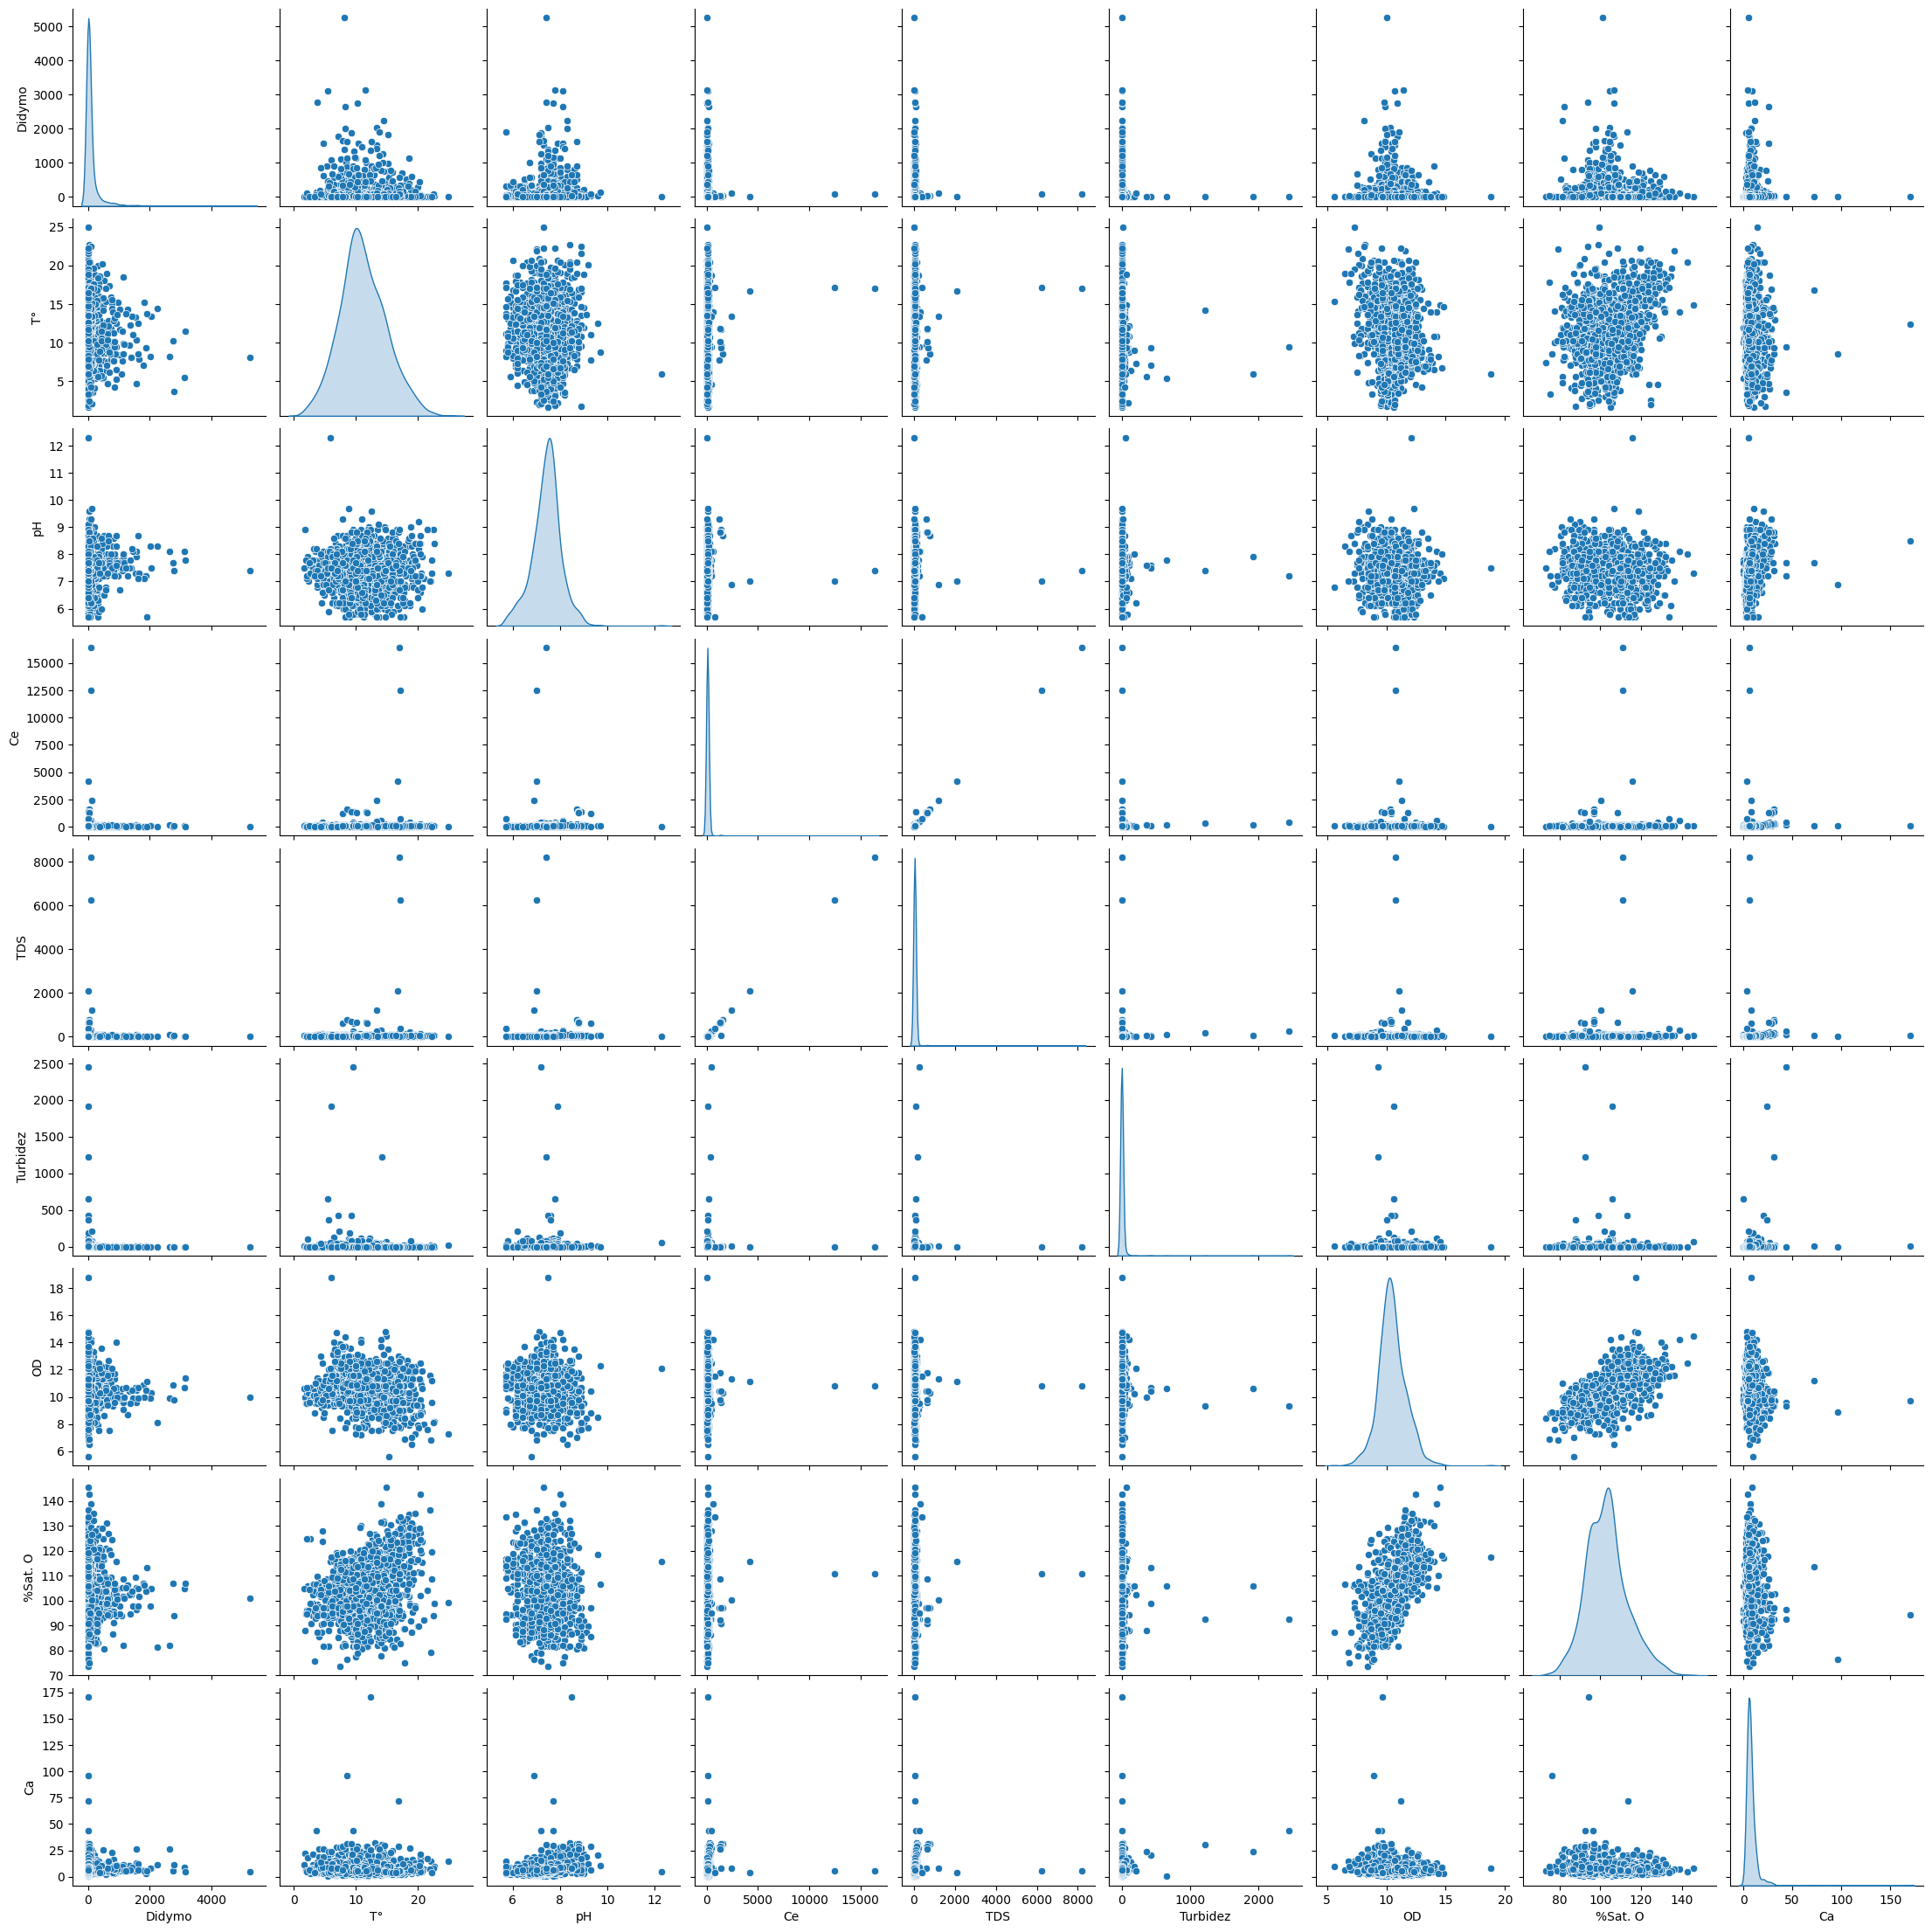

In [41]:
sns.pairplot(data[['Didymo', 'T°', 'pH', 'Ce', 'TDS', 'Turbidez', 'OD', '%Sat. O', 'Ca']], diag_kind="kde")

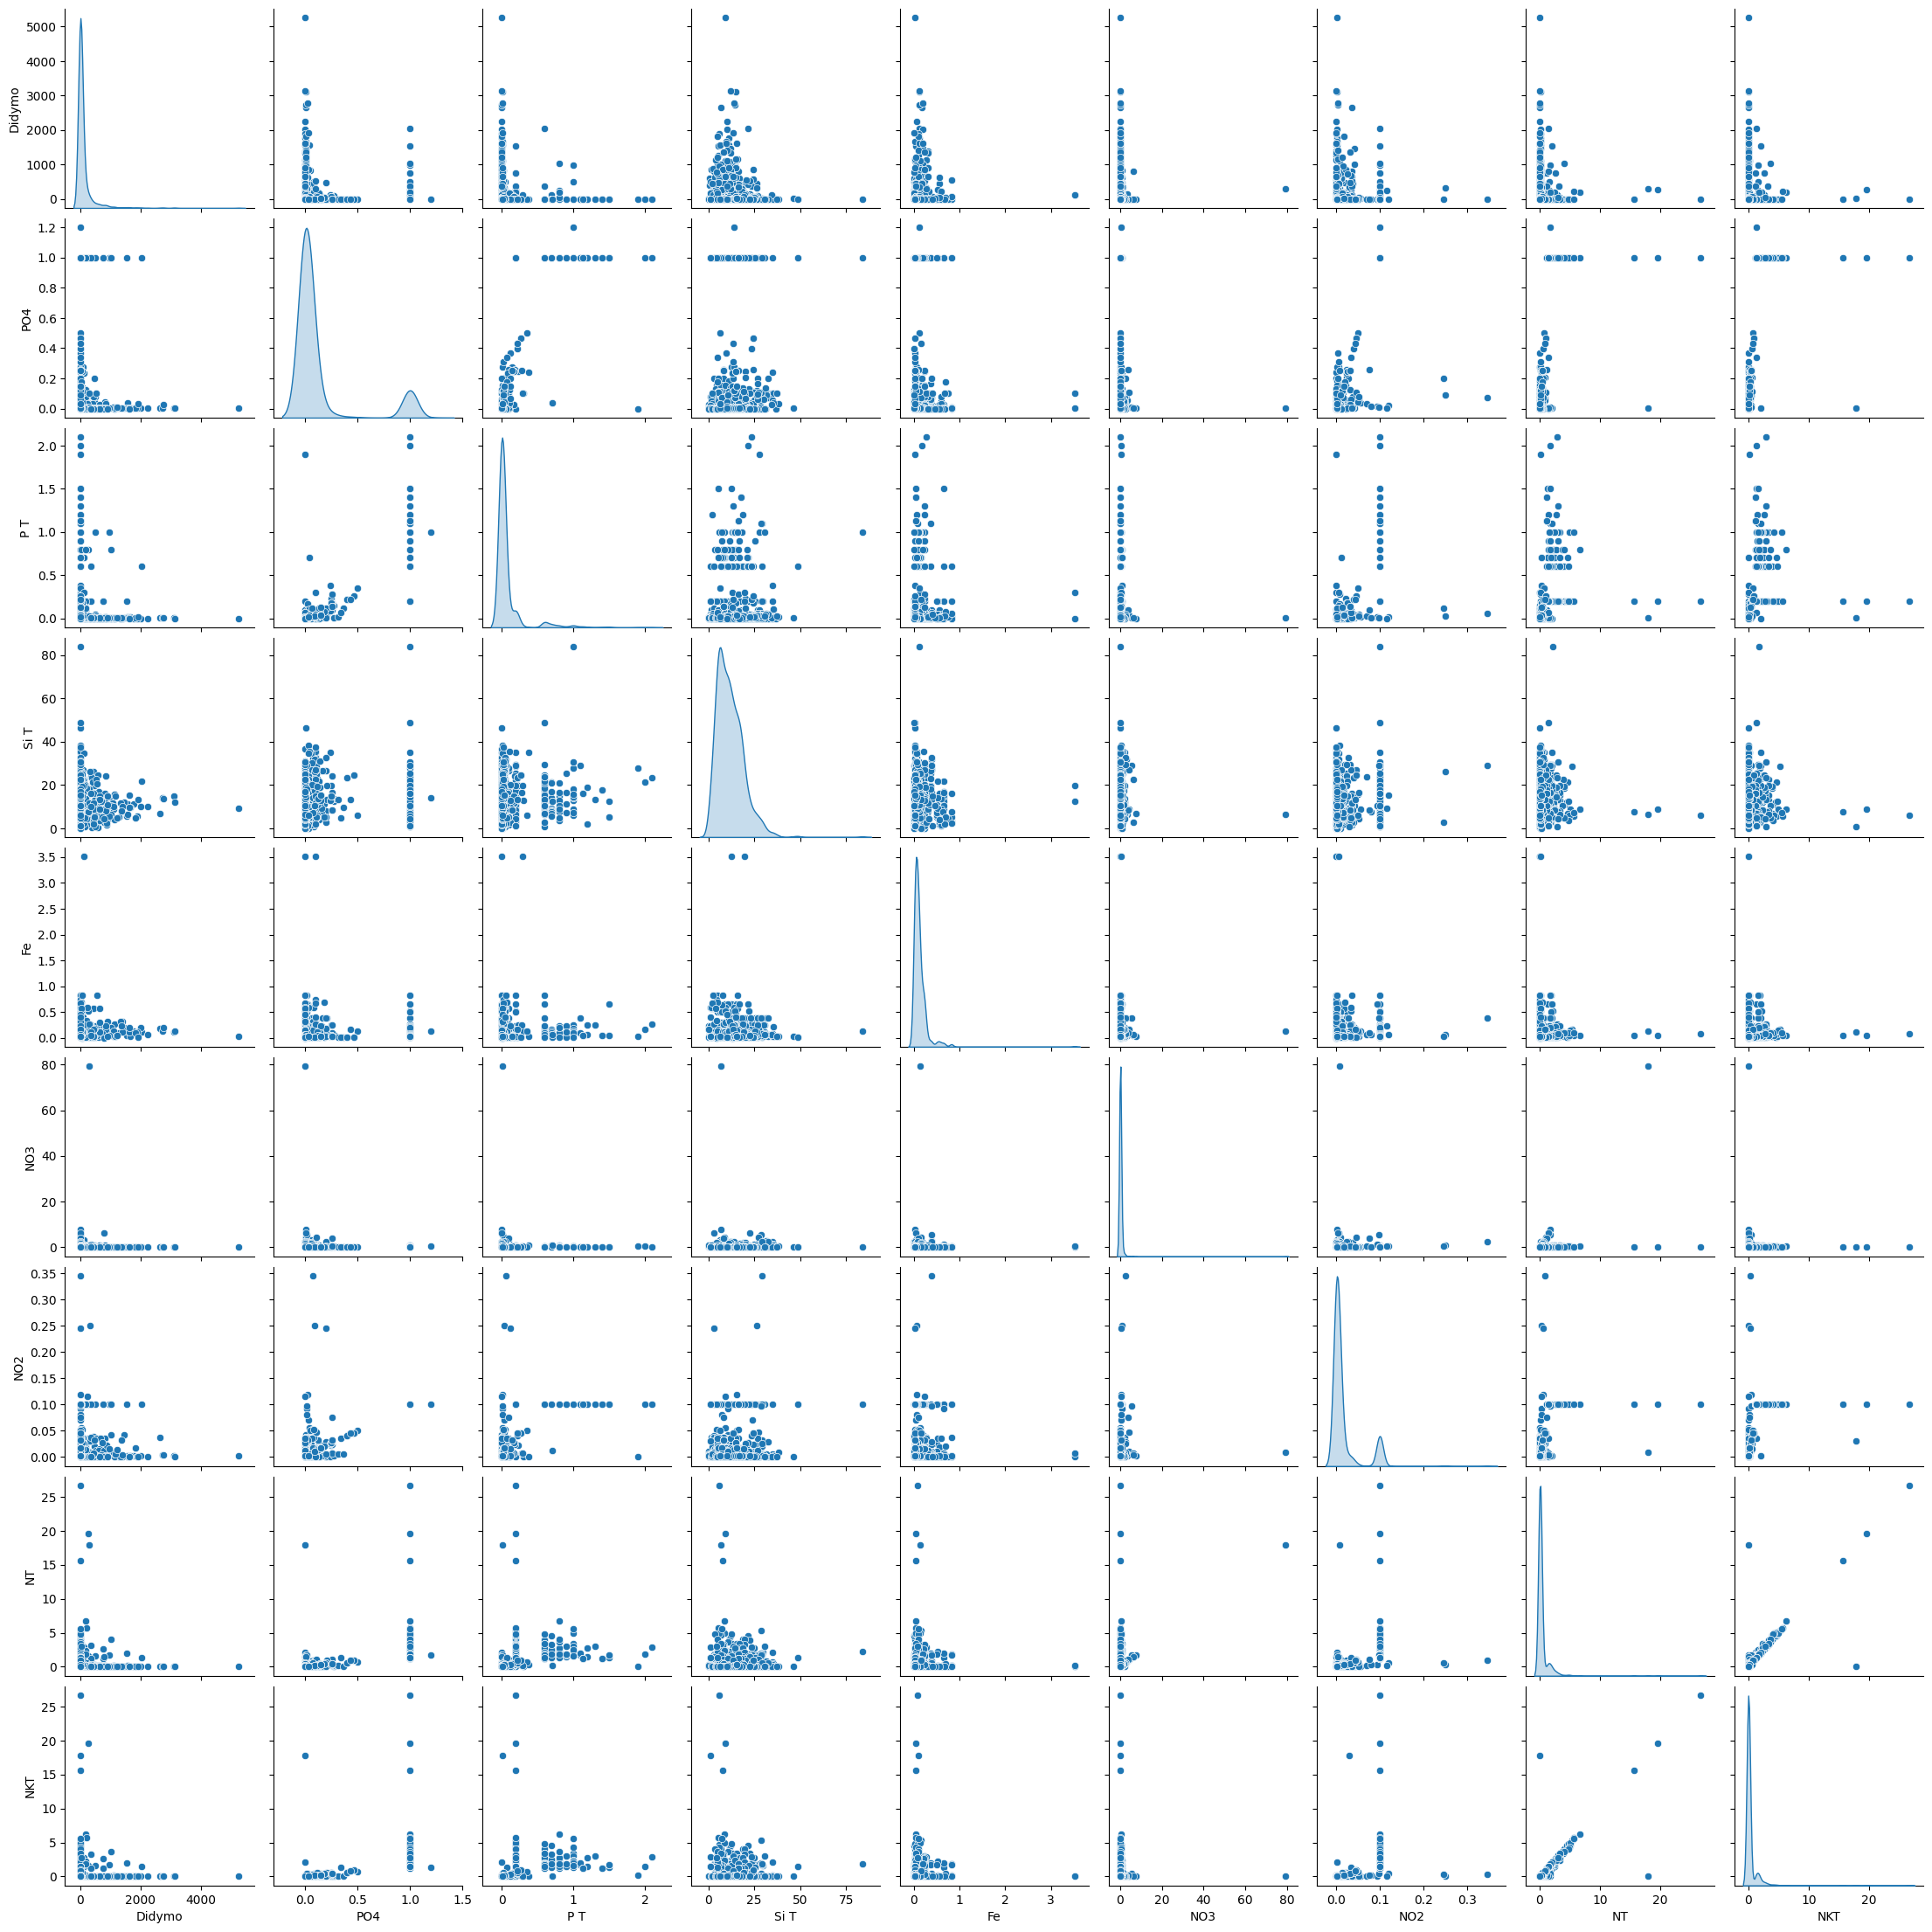

In [42]:
sns.pairplot(data[['Didymo', 'PO4', 'P T', 'Si T', 'Fe', 'NO3', 'NO2', 'NT', 'NKT']], diag_kind="kde")

<Axes: >

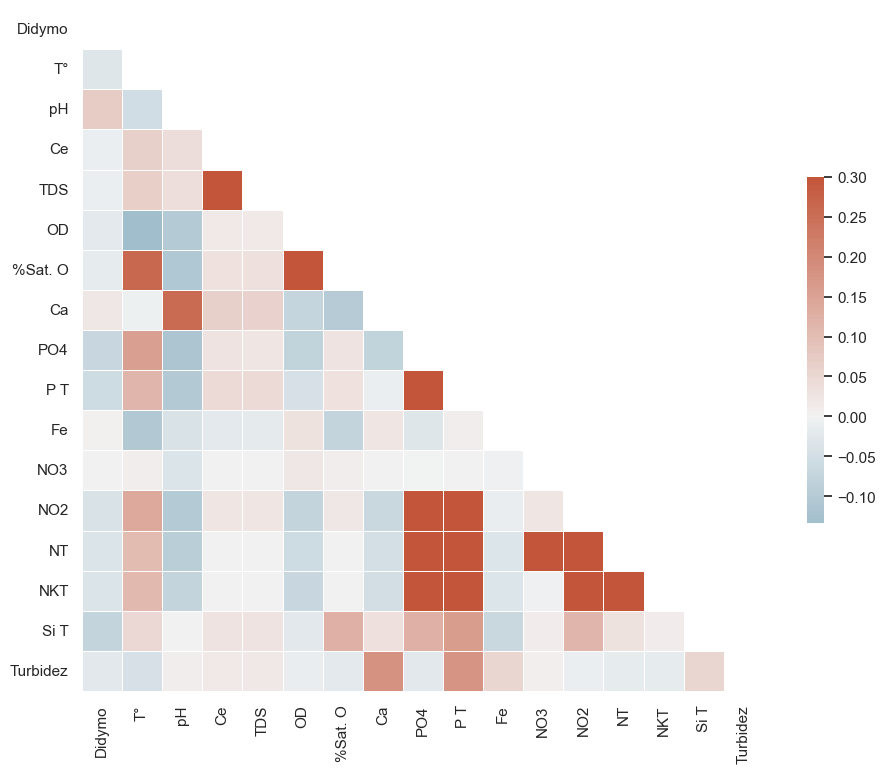

In [44]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data[['Didymo', 'T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca', 'PO4', 'P T', 
             'Fe', 'NO3', 'NO2', 'NT', 'NKT', 'Si T', 'Turbidez']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

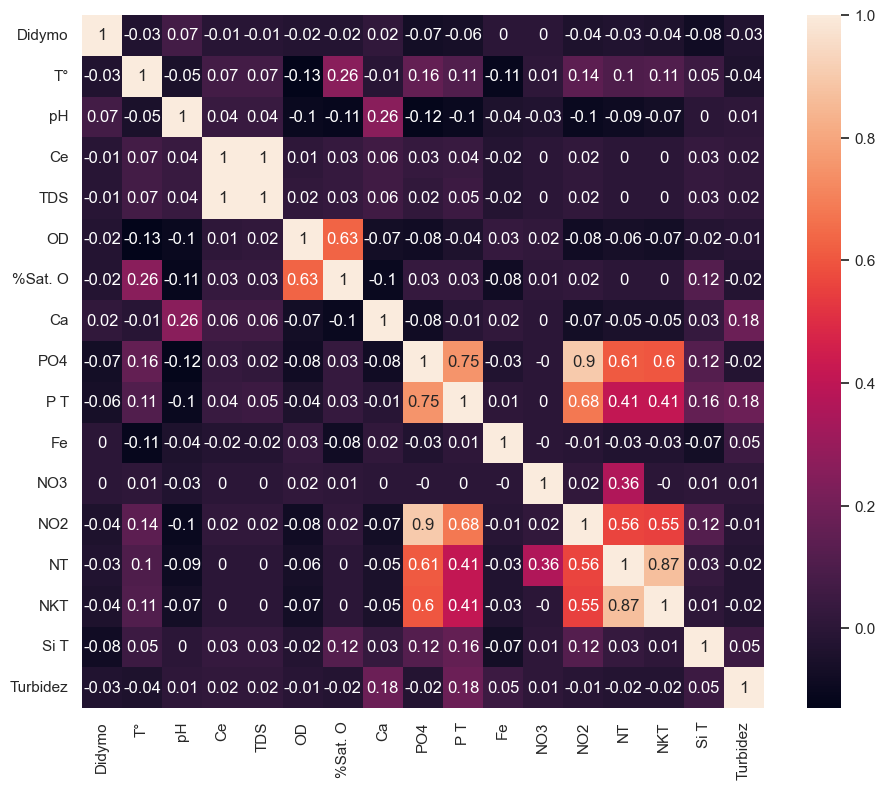

In [45]:
plt.subplots(figsize=(11, 9))
correlacion = sns.heatmap(data[['Didymo', 'T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca', 'PO4', 'P T', 
             'Fe', 'NO3', 'NO2', 'NT', 'NKT', 'Si T', 'Turbidez']].corr( ).round(2),annot=True)
correlacion

In [46]:
figure = correlacion.get_figure()    
figure.savefig('correlacion.png', dpi=400)

In [47]:
data = data.drop(columns=['cod_cuenca', 'cod_subcuenca', 'rio', 'epoca_muest'])

In [48]:
import warnings
warnings.filterwarnings("ignore")
data.columns
cols=['%Cob_algal_ausente', '%Cob_algal_Pequenas colonias', '%Cob_algal_Mediana', '%Cob_algal_Alta', '%Cob_algal_Muy Alta']
categoria = data[cols]
categoria["category"] = categoria.idxmax(axis=1)
categoria=categoria[["category"]]
categoria
data.insert(1, 'categoria', categoria["category"])
data

,T°,categoria,pH,Ce,TDS,OD,%Sat. O,Ca,PO4,P T,...,Crec_algal_Inicial,Crec_algal_Mediana,Crec_algal_Alta,Crec_algal_Muy Alta,%Cob_algal_ausente,%Cob_algal_Pequenas colonias,%Cob_algal_Mediana,%Cob_algal_Alta,%Cob_algal_Muy Alta,Didymo
0,14.8,%Cob_algal_Alta,8.2,80.0,40.0,11.8,118.4,7.9,1.000,0.6000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
1,15.6,%Cob_algal_Alta,6.7,73.0,36.0,12.2,124.2,9.2,1.000,0.7000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
2,11.1,%Cob_algal_Alta,7.1,152.0,76.0,10.0,101.5,5.5,1.000,0.2000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
3,15.2,%Cob_algal_Alta,7.8,82.0,13.8,11.8,111.8,4.2,1.000,1.0000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
4,13.9,%Cob_algal_Muy Alta,7.4,31.0,15.0,10.4,102.3,4.5,1.000,0.2000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,6.0,%Cob_algal_Mediana,7.5,44.0,22.0,18.8,117.3,8.3,0.151,0.0336,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.51
1601,13.5,%Cob_algal_Muy Alta,7.5,49.0,25.0,11.4,109.7,6.0,0.001,0.0004,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1602,11.7,%Cob_algal_Alta,7.4,74.0,37.0,11.3,105.9,5.3,0.001,0.0004,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
1603,7.0,%Cob_algal_Alta,7.4,39.0,19.0,13.3,118.4,8.3,0.151,0.0336,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.51


In [49]:
data.to_csv("data.csv", sep=';')